<a href="https://colab.research.google.com/github/vmatiasw/modelos_y_simulacion/blob/main/P7E1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

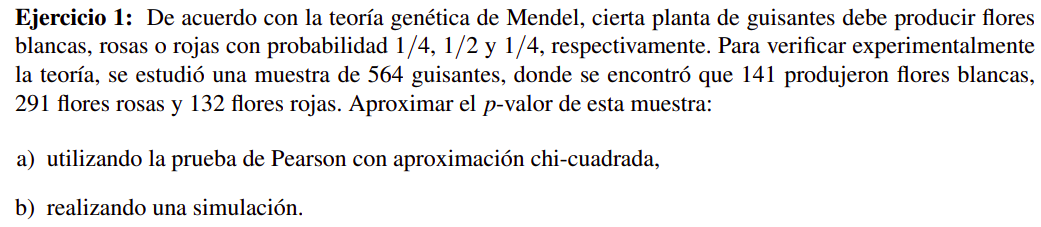

In [62]:
from scipy.stats import chi2
from random import random, seed
import numpy as np

n_TAMANO_MUESTRAS = 564
VALORES = ["Rosa", "Blanco", "Rojo"]
Ps = [0.5, 0.25, 0.25]
Ns_ORIGINAL = [291, 141, 132]

def calcular_estadisticoT(Ns, Ps, n):
  # return sum((N - n * P) ** 2 / (n * P) for N, P in zip(Ns, Ps))
  Ns = np.asarray(Ns)
  Ps = np.asarray(Ps)
  esperado = n * Ps
  return np.sum((Ns - esperado) ** 2 / esperado)

k = 2   # grados de libertad
t_ORIGINAL = calcular_estadisticoT(Ns_ORIGINAL, Ps, n_TAMANO_MUESTRAS) # valor observado

p_valor = chi2.sf(t_ORIGINAL, df=k)
print(f"p-valor = P(chi-cuad_{k} >= {t_ORIGINAL:.4f}) = {p_valor:.4f}")

p-valor = P(chi-cuad_2 >= 0.8617) = 0.6500


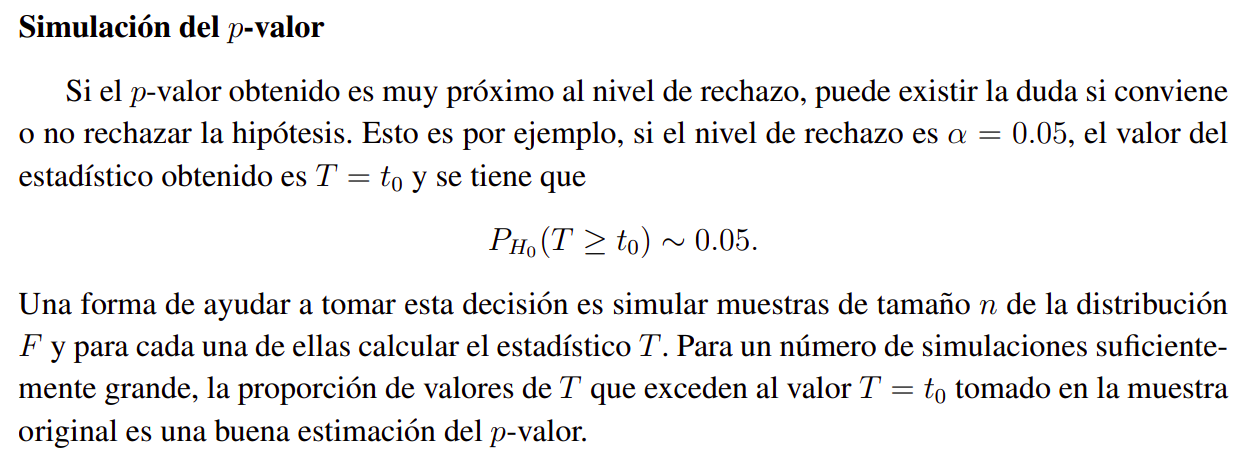

In [63]:
def muestreador_F(): # F = Dist H0
    u = random()
    acc = 0
    for valor, prob in zip(VALORES, Ps):
        acc += prob
        if u < acc:
            return valor

def estimar_Pvalor_conF(n_sim):
  t_mayores_que_t_original = 0
  for _ in range(n_sim):
    muestra = [muestreador_F() for _ in range(n_TAMANO_MUESTRAS)]
    Ns_muestra = [muestra.count(x) for x in VALORES]
    t_muestra = calcular_estadisticoT(Ns_muestra, Ps, n_TAMANO_MUESTRAS)
    if t_ORIGINAL < t_muestra:
      t_mayores_que_t_original += 1
  return t_mayores_que_t_original / n_sim

seed(1)
print(f"p-valor estimado = {estimar_Pvalor_conF(100_000)}")

p-valor estimado = 0.64429


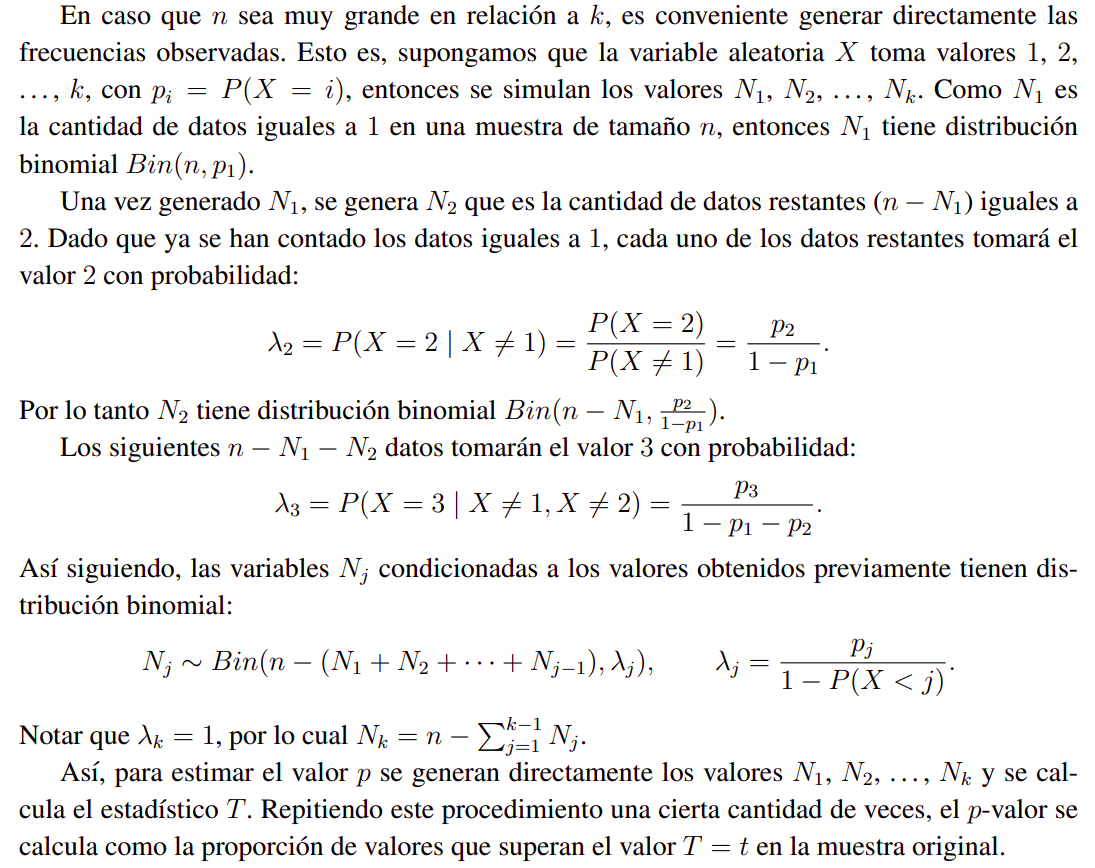

In [71]:
def muestreador_binomial(n,p):
    razon_chances = p / (1 - p) # odds ratio
    prob = (1 - p) ** n # P(X=0)
    Fx = prob
    x = 0
    u = random() # U ~ Uniforme(0, 1)

    while u >= Fx:
        prob *= razon_chances * (n - x) / (x + 1)
        Fx += prob # F(x)
        x += 1

    return x

def generar_frecuencias():
    Ns = []
    anterior_Fv = 0 # F(anterior v)
    anterior_sum_Ns = 0
    for prob_v in Ps[:-1]:
        N_v = muestreador_binomial(n_TAMANO_MUESTRAS - anterior_sum_Ns, prob_v / (1 - anterior_Fv))
        Ns.append(N_v)
        anterior_Fv += prob_v
        anterior_sum_Ns += N_v
    Ns.append(n_TAMANO_MUESTRAS - anterior_sum_Ns)
    return Ns

n_sim = 100_000
frec_muestras = [generar_frecuencias() for _ in range(n_sim)]
frec_muestra = [(v, sum([frecs[i] for frecs in frec_muestras]) / n_sim) for i, v in enumerate(VALORES)]
print(frec_muestra)
print(list(zip(VALORES, Ns_ORIGINAL)))

[('Rosa', 281.9941), ('Blanco', 140.99051), ('Rojo', 141.01539)]
[('Rosa', 291), ('Blanco', 141), ('Rojo', 132)]


In [72]:
def estimar_Pvalor_conFrec(n_sim):
  t_mayores_que_t_original = 0
  for _ in range(n_sim):
    Ns_muestra = generar_frecuencias()
    t_muestra = calcular_estadisticoT(Ns_muestra, Ps, n_TAMANO_MUESTRAS)
    if t_ORIGINAL < t_muestra:
      t_mayores_que_t_original += 1
  return t_mayores_que_t_original / n_sim

seed(1)
print(f"p-valor estimado = {estimar_Pvalor_conFrec(100_000)}")

p-valor estimado = 0.64495


# como curiosodad

In [ ]:
def muestreador_dist_empirica():
    u = random() * n_TAMANO_MUESTRAS
    acc = 0
    for valor, frec in zip(VALORES, Ns_ORIGINAL):
        acc += frec
        if u < acc:
            return valor

n_sim = 100_000
muestra = [muestreador_dist_empirica() for _ in range(n_sim)]
frec_muestra = [(v, (muestra.count(v) / n_sim) * n_TAMANO_MUESTRAS) for v in VALORES]
print(frec_muestra)
print(list(zip(VALORES, Ns_ORIGINAL)))